# Deep Learning Checkboxes

## 1. My Development Environment
- Windows Desktop with NVIDIA GPU - 1080 ti
- Conda environment with Tensorflow (1.13.1) and Keras GPU version, Python 3.6

## 2. Folder Structure
- data path    -> C:\projects\science\checkbox-data         (ie extract checkbox-data.tgz here)
- scripts path -> C:\projects\science\checkbox               (this notebook lives in here)
- models       -> C:\projects\science\models                (upon running this notebook model is stored here)
- pwd          -> C:\projects\science\checkbox

## 3. Build Model

In [2]:
from split import split
from train import train_resnet_classification
from report import report

In [3]:
# Make train-val-test split
dpath = '../checkbox-data/'
proc_data_path = '../'
split(dpath, proc_data_path)
# abobe call creates ../data/ folder and copies images as needed by flow_from_directory

In [4]:
# Train Resnet50 - Transfer learning
num_classes = 3
tmode = "train_head"
train_resnet_classification(num_classes, tmode, proc_data_path)
# above call creates models in ../models/train_head.h5

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\Vaishali\Anaconda3\envs\vinayenv\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Found 502 images belonging to 3 classes.
Found 143 images belonging to 3 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 9s 85ms/step - loss: 0.8218 - acc: 0.6471 - val_loss: 1.5447 - val_acc: 0.3019

Epoch 00001: val_acc improved from -inf to 0.30189, saving model to ..//models/train_head.h5
Epoch 2/30
100/100 [==============================] - 6s 58ms/step - loss: 0.6103 - acc: 0.7642 - val_loss: 1.6964 - val_acc: 0.2893

Epoch 00002: val_acc did not improve from 0.30189
Epoch 3/30
100/100 [==============================] - 6s 60ms/step - loss: 0.5014 - acc: 0.8046 - val_loss: 2.1971 - val_acc: 0.2830 0.5008 - acc: 0.

Epoch 00003: val_acc did not improve from 0.30189
Epoch 4/30
100/100 [==============================] - 6s 59ms/step - loss: 0.5422 - acc: 0.7954 - val_loss: 1.8393 - val_acc: 0.3459

Epoch 00004: val_acc improved from 0.30189 to 0.34591, saving model to ..//models/train_head.h5
Epoch 5/30
100/100 [========

In [5]:
#Fine tune- ResNet50
tmode = "finetune"
train_resnet_classification(num_classes, tmode, proc_data_path)
# above call creates models in ../models/finetune.h5

Found 502 images belonging to 3 classes.
Found 143 images belonging to 3 classes.
Epoch 1/30
100/100 [==============================] - 18s 185ms/step - loss: 0.3944 - acc: 0.8683 - val_loss: 0.6091 - val_acc: 0.8113

Epoch 00001: val_acc improved from -inf to 0.81132, saving model to ..//models/finetune.h5
Epoch 2/30
100/100 [==============================] - 11s 112ms/step - loss: 0.3835 - acc: 0.8550 - val_loss: 0.7059 - val_acc: 0.7358

Epoch 00002: val_acc did not improve from 0.81132
Epoch 3/30
100/100 [==============================] - 11s 112ms/step - loss: 0.3348 - acc: 0.8717 - val_loss: 0.6730 - val_acc: 0.8050

Epoch 00003: val_acc did not improve from 0.81132
Epoch 4/30
100/100 [==============================] - 11s 112ms/step - loss: 0.2764 - acc: 0.9075 - val_loss: 0.6744 - val_acc: 0.7799

Epoch 00004: val_acc did not improve from 0.81132
Epoch 5/30
100/100 [==============================] - 11s 112ms/step - loss: 0.2507 - acc: 0.9100 - val_loss: 0.7667 - val_acc: 0.811

Finetune produced improved the val accurac to 86%

Test accuracy = 87.0%
[[21  2  0]
 [ 1 22  0]
 [ 1  5 17]]


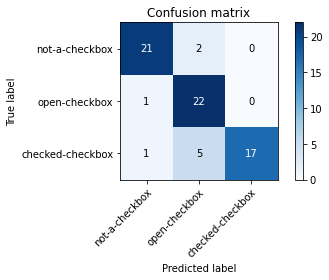

In [6]:
#Run the model on test set and get model accuracy on test set
report(proc_data_path)

We are able to get test accuracy of 87% which is comparable to val accuracy

## 4. Make Predictions

In [2]:
from predict import predict

In [5]:
#Predict on a test image
test_image = '../data/test/0_checkbox-06.open.png'
predict(test_image, proc_data_path)

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\Vaishali\Anaconda3\envs\vinayenv\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


open-checkbox


'open-checkbox'

## 5. Possible next steps

- Build end-to-end YOLO which takes entire document as input and localize checkboxes. YOLO can learn non-checkboxes as background without annotation.

- Consider Classical Image Processing methods ex- morphological image processing

- Get more annotated data from this website-https://www.shutterstock.com/search/handwritten+checkmark
